
# Notebook: Principal Component Analysis

In this notebook, we present the **Principal Component Analysis** algorithm and related applications such as data visualization or data compression.

## Contents
The structure of the notebook is as follows:
* Introducing Principal Component Analysis
* PCA as dimensionality reduction
* PCA for visualization: Wisconsin Diagnostic Breast Cancer Database
* Choosing the number of components
* Using PCA to find the perfect human
* PCA for image reconstruction


## Sources
<!--BOOK_INFORMATION-->
*This notebook has been modified by Aythami Morales from:

i) the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.*

ii) the BE/Bi 103 Data Analysis in the Biological Sciences [PCA tutorial](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2016/tutorials/aux4_pca.html) by Heidi Klumpe and Manuel Razo.

iii) Michael Galarnyk [Python tutorials](https://github.com/mGalarnyk)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn is a package for statistical data visualization
#!pip install seaborn
import seaborn as sns; sns.set()


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\sarav\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00


## 1. Introducing Principal Component Analysis

Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

Its behavior is easiest to visualize by looking at a synthetic two-dimensional dataset.
Consider the following 200 points:

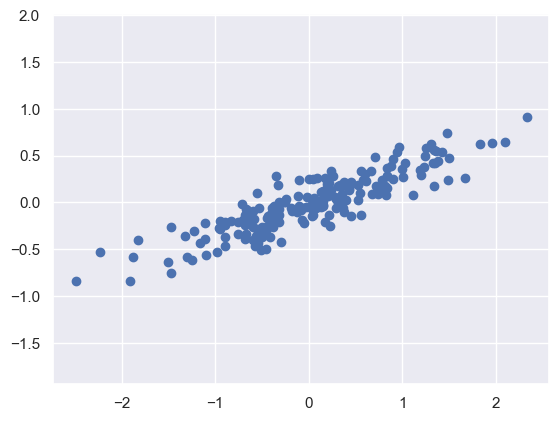

In [7]:
# data.npy contains a synthetically generated two-dimensional data with 200 points
X=np.load('./data/data.npy')
# plot the 2 variables x0, x1
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

We can observe the different distribution of $\mathbf{X}_{:,0}$ and $\mathbf{X}_{:,1}$ in our data by its projections:

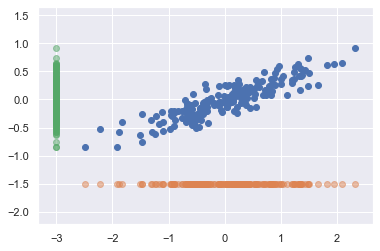

In [3]:
# plot the 2 variables x0, x1
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
# plot the projections into horizontal and vertical axes (only visualization purpose)
plt.scatter(X[:, 0], -1.5*np.ones(len(X[:, 0])), alpha=0.5)
plt.scatter(-3*np.ones(len(X[:, 1])), X[:, 1], alpha=0.5)

By eye, it is clear that there is a nearly linear relationship between the $x_{0}$ and $x_{1}$ variables. The unsupervised learning problem attempts to learn about the *relationship* between the $x_{0}$ and $x_{1}$ values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset. Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [ ]:
# import PCA module from sklearn
from sklearn.decomposition import PCA
# define the PCA algorithm parameters, in this example only the number of components
pca = PCA(n_components=2) # número de variables = n, número de filas = M. En sklearn, si no especificamos el número de componentes, calculará el menor número de componentes entre n y M.
# fit PCA algorithm to your data
pca.fit(X) # Ajuste a un conjunto de datos específico, probablemente no válido para otros conjuntos de datos.

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components", explained variance" and  "explained variance ratio":

In [10]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [11]:
print(pca.explained_variance_) # Varianza de cada componente.

[0.7625315 0.0184779]


In [7]:
print(pca.explained_variance_ratio_) # Para cada componente hacemos la cuenta VARi = lambda i/sumatorio lambda. Con la primera componente somos capaces de retener el 97% de la varianza.

[0.97634101 0.02365899]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

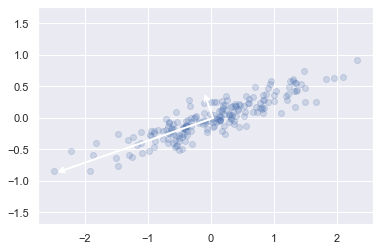

In [8]:
#add your modules to the path
import sys
sys.path.append('./my_modules')

#my_module is an example of python module created to include your functions
import my_module

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# plot vectors to visualize the variance of the data
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    my_module.draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.

The projection of each data point onto the principal axes are the "principal components" of the data.


This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

## 2. PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [9]:
# define the PCA parameters, only 1 component in this example
pca = PCA(n_components=1)
# fit PCA algorithm to your data
pca.fit(X)
# project the data according to the PCA components (1 component in this example)
X_pca = pca.transform(X) # X_pca sería Z
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

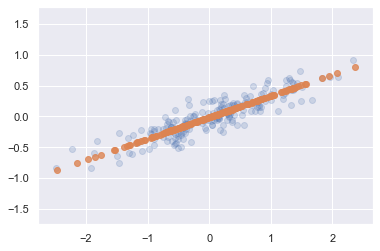

In [10]:
# reconstruction of the data from the projection
X_new = pca.inverse_transform(X_pca)
# plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# plot the reconstructed data
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## 3. PCA for visualization: Wisconsin Diagnostic Breast Cancer Database

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

To see this, let's take a quick look at the application of PCA to the 'Wisconsin Diagnostic Breast Cancer' from the UCI repository (<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>). The task of interest is to predict whether or not a cell corresponds to a malignant tumor. In this dataset all attributes (32 attributes) take real values. These include area, smoothness, perimeter, etc.

We start by loading the data:

In [2]:
# read the data, 30 features for each record
data = pd.read_csv('./data/wdbc.csv')
X = data.values[ :, 2:].astype(np.float)
# as a supervised problem, we have an associated label (benign, malign) to each sample on X
y = (data.values[ :, 1 ] == 'B').astype(np.int)
target_names = np.array([('benign'), ('malign')], dtype=np.dtype('U10'))
                 
# make a DataFrame with a species column for the first 5 features
X5 = X[ :, 0:5].astype(np.float)
df_cancer = pd.DataFrame(X5)
df_cancer['target'] = target_names[y]

# take a look at df_cancer
df_cancer.head(5)

,0,1,2,3,4,target
0,20.57,17.77,132.90,1326.0,0.08474,benign
1,19.69,21.25,130.00,1203.0,0.10960,benign
2,11.42,20.38,77.58,386.1,0.14250,benign
3,20.29,14.34,135.10,1297.0,0.10030,benign
4,12.45,15.70,82.57,477.1,0.12780,benign


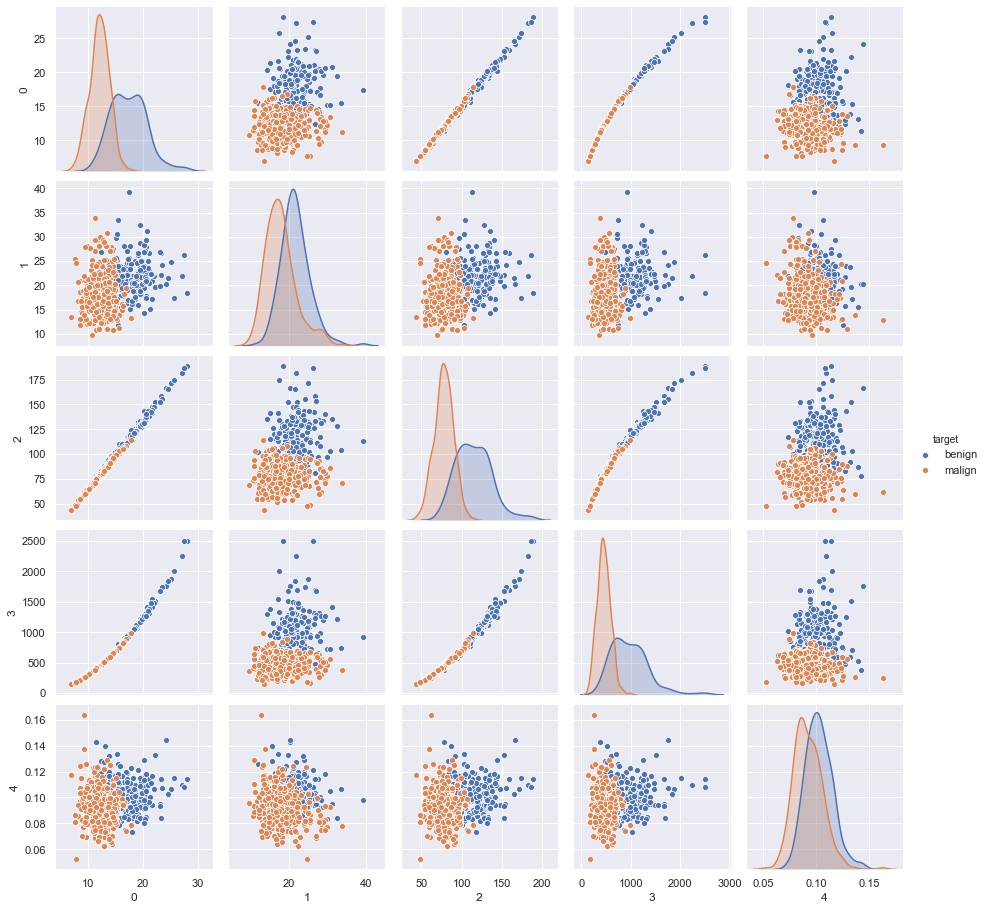

In [3]:
# Plot pairwise comparison to explore the data. En cada fila estamos comparando un característica con cada una de las demás. Correlación lineal: una característica aporta poca información con respecto a la otra, información redundante. 
_ = sns.pairplot(df_cancer, hue='target')

plt.show()

Recall that the data consists of 568x32 matrix, meaning that they are 32-dimensional feature vectors from 568 samples. We ignore the first attribute in this dataset, which corresponds to the ID of each sample. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

To gain some intuition into the relationships between features, we can use PCA to project them to a more manageable number of dimensions, say two:

In [6]:
# define the PCA parameters, 4 components in this example
pca = PCA(n_components=4) 
# project from 30 to 4 dimensions according to the PCA components
X_r = pca.fit(X).transform(X)
print(X.shape)
print(X_r.shape)


print('explained variance ratio (first 16 components): %s'
      % str(pca.explained_variance_ratio_))


(568, 30)
(568, 4)
explained variance ratio (first 16 components): [9.82298063e-01 1.59270546e-02 1.55678370e-03 1.21340333e-04]


We can now plot the first two principal components of each point to learn about the data:

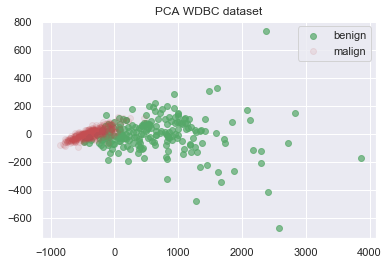

In [7]:
plt.figure()
comp1=0; #first component to visualize, you can modify it
comp2=1; #second component to visualize, you can modify it

# plot the two components selected above for both malign and benign tumors
plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='r', alpha=.7, lw=1,
                label='benign')

plt.scatter(X_r[y == 1, comp1], X_r[y == 1, comp2], color='g', alpha=.1, lw=1,
                label='malign')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA WDBC dataset')

plt.show()

# Cuando las células están bien, todas son más o menos iguales. Las células cancerígenas, sin embargo, tienen mucha más variabilidad.

Recall what these components mean: the full data is a 30-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

Essentially, we have found the optimal stretch and rotation in 30-dimensional space that allows us to see the layout of the data in two dimensions.

## 4. Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

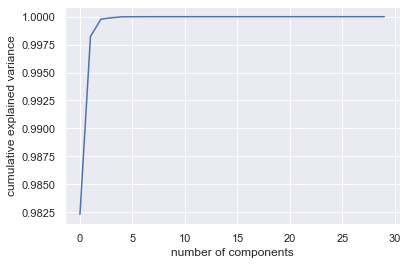

In [8]:
# fit PCA algorithm to your data
pca = PCA().fit(X)
# plot the variance ratio according to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 30-dimensional variance is contained within the first $N$ components.
For example, we see that with the WDBC dataset the first 2 components contain approximately 99% of the variance.

Here we see that our two-dimensional projection loses a reduced amount of information (as measured by the explained variance) and that we'd need only two features (in the transformed domain) to retain 99% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## 5. Using PCA to find the perfect human

Genomes are hard to interpret. And so are PCA plots. Lior Pachter makes both these points in an interesting [blog post](https://liorpachter.wordpress.com/2014/12/02/the-perfect-human-is-puerto-rican/), where he calculates who the perfect human being would be according to their genomic SNP profile.

[SNPedia](http://www.snpedia.com/) is a database that contains a compilation of SNPs classified as *good* or *bad* according to some [GWAS](https://en.wikipedia.org/wiki/Genome-wide_association_study) criteria.
Lior did the following:

1. He created a "perfect human" *in silico* by setting the alleles at all SNPs so that they are "good".
2. He then added the "perfect human" to a panel of genotyped individuals from across a variety of populations and performed **PCA** to reveal the location and population of origin of the individual that was closest to this hypothetical perfect human.

#### What is SNP?

Single nucleotide polymorphisms, frequently called SNPs (pronounced “snips”), are the most common type of genetic variation among people. Each SNP represents a difference in a single DNA building block, called a nucleotide.

We will use his data and repeat the analysis to find out who the perfect human being is and where is he/she from.  You can download the SNP table, as well as information about the subjects [here](../data/pachter.zip).

We will load it into a `DataFrame` where each column heading refers to a SNP and each row is a given subject.  The index of the row is a string representing the subject (including `'perfect'`), and the column headings are the SNP IDs.

In [9]:
# import the packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn

# import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns

# read the SNP table
df_snp = pd.read_csv('./data/geno_table.txt', delimiter='\t',
                     index_col='snp_id').transpose()
df_snp.head()

snp_id,rs307377,rs7366653,rs41307846,rs3753242,rs35082957,rs34154371,rs35426403,rs1143016,rs3890745,rs17472401,...,rs6007897,rs9615362,rs9627183,rs28372448,rs121913039,rs121913037,rs5770917,rs6151429,rs743616,rs2071421
perfect,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
HG00096,2,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
HG00097,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
HG00099,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
HG00100,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


Because we will do PCA with these data, they should be floating point numbers instead of integers.

We also have data about each individual, such as where they are from. The integrated_call_samples_v3.20130502.ALL.panel file is also included in the ZIP file containing the data.

In [10]:
# convert the dato to type float
df_snp = df_snp.astype(np.float)

# Read the description of each individual
fname = './data/integrated_call_samples_v3.20130502.ALL.panel'
df_info = pd.read_csv(fname, delimiter='\t', 
                      index_col=0).dropna(axis=1, how='all')
df_info.head()

,pop,super_pop,gender
sample,,,
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female
HG00099,GBR,EUR,female
HG00100,GBR,EUR,female
HG00101,GBR,EUR,male


For convenience, we'll add this information to the SNP DataFrame.

In [11]:
# add to the SNP dataframe the information about gender and super_pop
aux_cols = ['pop', 'super_pop', 'gender']
df_snp[aux_cols] = df_info

# change the super_pop column for the perfect human being
df_snp.loc['perfect', ['pop', 'super_pop']] = ['Perfect Human']*2

# take a look at auxiliary columns
df_snp[aux_cols].head()

snp_id,pop,super_pop,gender
perfect,Perfect Human,Perfect Human,NaN
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female
HG00099,GBR,EUR,female
HG00100,GBR,EUR,female


**A note about units:** the subspaces that you obtain from performing PCA are not scale invariant. This means that, for example, if your dataset contains things measured in nanometers and things measured in meters, or even worse things measuring completely unrelated things, the units in which your measurement is stored would affect the PCA analysis.
The simplest way to avoid this issue is to form a "common set of units" by standardizing your values such that they all have a common mean and variance (usually set to be zero and one respectively). Though still a somewhat subjective choice, this ensures that variance in each dimension happen on roughly the same scale.
Fortunately, as in almost every case, scikit-learn can do the job for us. We will simply use the StandardScaler class from the preprocessing module of scikit-learn to fix this.

In [12]:
# standardize the data before performing PCA
# we use .drop to remove the gender, pop and super_pop columns to avoid errors.
df_snp_std = sklearn.preprocessing.StandardScaler().fit_transform(
                            df_snp.drop(aux_cols, axis=1))

# define the number of components
n_components=5
snp_pca = PCA(n_components=n_components)

# project the data into this new PCA space
snp_pca.fit(df_snp_std)
df_snp_pca = snp_pca.transform(df_snp_std)

# convert back to a nice tidy dataframe
df_snp_pca = pd.DataFrame(df_snp_pca, 
                columns=['PC' + str(x) for x in range(1, n_components+1)], 
                index=df_snp.index)

# add again the gender, pop, and super_pop columns
df_snp_pca[aux_cols] = df_snp[aux_cols]
df_snp_pca.head()

,PC1,PC2,PC3,PC4,PC5,pop,super_pop,gender
perfect,-2.221873,-13.823952,193.950554,26.724049,-2.309856,Perfect Human,Perfect Human,NaN
HG00096,-6.037516,-15.947683,0.535353,-3.396483,-3.547062,GBR,EUR,male
HG00097,-6.310191,-14.804931,1.028160,-13.756635,4.550498,GBR,EUR,female
HG00099,-7.102287,-15.820245,4.377741,-4.121734,-3.075277,GBR,EUR,female
HG00100,-6.006800,-17.297061,0.384041,-4.462503,-2.632675,GBR,EUR,female


Great! Now, we know that plotting our multi-dimensional data in 2-D will give us an idea of which points are similar and dissimilar. So, if we believe genetic fitness is entirely determined by the absence and presence of universally good and bad SNPs, we may be interested in which humans are closest to the "perfect" human created by Lior Pachter. (Shortly after, we may offer our services to Hydra.) We will find this out by plotting all the SNP profiles in 2-D space.

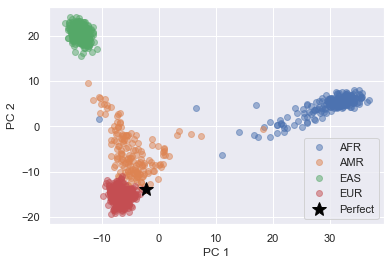

In [26]:
# plot all populations except the perfect human
cols = ~df_snp_pca['super_pop'].isin(['Perfect Human'])
df_gb = df_snp_pca[cols].groupby(['super_pop'])
for key, group in df_gb:
    plt.plot(group.PC1, group.PC2, 'o', alpha=0.5, label=key)

# add the perfect human being to the plot
plt.plot(df_snp_pca.PC1['perfect'], df_snp_pca.PC2['perfect'], '*', 
         markersize=15, color='black', label='Perfect')

# tidy the plot
plt.margins(0.05)
plt.legend(loc=0)
plt.xlabel('PC 1')
plt.ylabel('PC 2');

So the closest point to the perfect human being is patient HG00737 a **Puerto Rican woman!**

How confident are we that this plot indicates a Puerto Rican woman is the closest to being perfect? What if we considered additional axes?

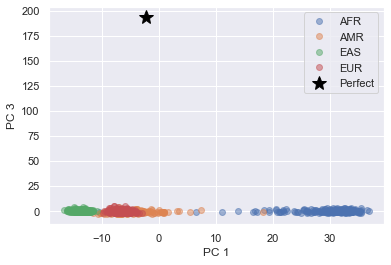

In [27]:
# Plot all populations except the perfect human
cols = ~df_snp_pca['super_pop'].isin(['Perfect Human'])
df_gb = df_snp_pca[cols].groupby(['super_pop'])
for key, group in df_gb:
    plt.plot(group.PC1, group.PC3, 'o', alpha=0.5, label=key)

# Add the perfect human being to the plot
plt.plot(df_snp_pca.PC1['perfect'], df_snp_pca.PC3['perfect'], '*', 
         markersize=15, color='black', label='Perfect')

# Tidy the plot.
plt.margins(0.05)
plt.legend(loc=0)
plt.xlabel('PC 1')
plt.ylabel('PC 3');

The perfect human is actually... not human. What happened here?
We didn't check how much variance the first two axes explained; for the most part, we picked two dimensions because we publish papers in a two-dimensional format. It seems that there is a significant amount of variance explained by the third axis. In fact, it separates the "perfect" human from all other humans.

Variance percent explained
 [0.05660433 0.04227824 0.00728842 0.00597725 0.00540378]


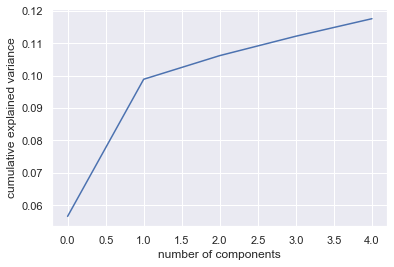

In [28]:
# plot the variance ratio according to the number of components
print('Variance percent explained\n', snp_pca.explained_variance_ratio_)

plt.plot(np.cumsum(snp_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

It seems our plot explains less than 10% of the variation. A 2-D plot is vastly oversimplified. Looking at the 3-D plot, we see how we fooled ourselves.

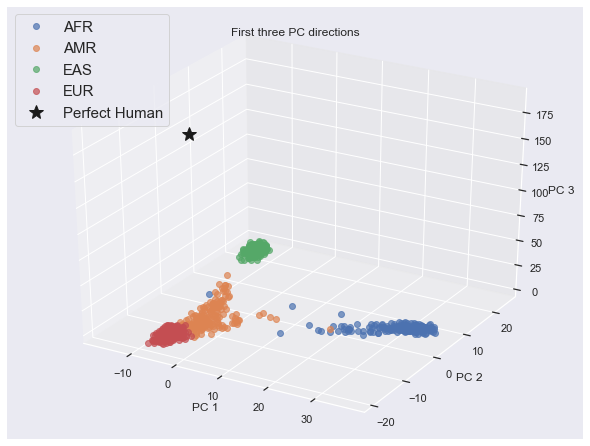

In [29]:
# plot in 3D with the first 3 PCA components
fig = plt.figure(1, figsize=(8, 6))
ax = mpl_toolkits.mplot3d.Axes3D(fig)
for key, group in df_snp_pca.groupby(['super_pop']):
    if key == 'Perfect Human':
        ax.plot(group.PC1, group.PC2, group.PC3, 'k*', markersize=15,
                label=key)
    else:
        ax.plot(group.PC1, group.PC2, group.PC3, 'o', alpha=0.7, label=key)

ax.set_title("First three PC directions")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend(loc='upper left', fontsize=15);

This is an important reminder that PCA removes some variance to help us focus on the largest (and presumably most important) variance. Here however, there was important information even in the "lower" order variation. By plotting in 2-D, we implicitly assumed that most of the structure of SNP variation is itself 2-D. Perhaps, for something very complex like genomes, we should expect many higher order interactions to be still be important to understanding the system.

A note on Pachter's analysis: This blog post ended up being fairly controversial because it is so easy to (mis)interpret the 2-D PCA plot. Lior's original intent was to show that James Watson's racist ideas of having a perfect human being were completely wrong. Instead, however, most people took the sarcastic title seriously. Eventually, scientists from Puerto Rico, who collected the samples, explained the actual results for the people that only read Lior's title.

<font color='red'>TASK: CREATE AN AUTOMATIC PROGRAM TO DEFINE THE NUMBER OF COMPONENTS NECCESSARY TO RETAIN 99% OF VARIANCE ON SNPedia DATABASE</font> 

In [24]:
# Mínimo número de componentes necesarias para retener el 99% de la varianza. Algoritmo de búsqueda,
# habrá que parar cuando la suma de ratios sea por primera vez igual o mayor a 99%. El resultado es 1041. De 4000 y pico variables pasamos a 1000 y pico, estamos quedándonos con un cuarto de las variables iniciales. Se trata de una reducción importante (el 75% de las variables contienen información redundante).

<br>
<font color='red'>ADD YOUR ANALYSIS</font> 
<br>
<br>
<br>
<br>
<br>

## 5. Using PCA for Image Reconstruction

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Parameters | Number
--- | ---
Classes | 10
Samples per class | ~7000 samples per class
Samples total | 70000
Dimensionality | 784
Features | integers values from 0 to 255

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [1]:
%matplotlib inline
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('./my_modules')
import my_module

Load the MNIST data

In [2]:
# You can add the parameter data_home to wherever to where you want to download your data
mnist = list(my_module.read_MNIST())

In [3]:
# These are the images and pixels of the first data sample
label,pixels=mnist[0]

In [4]:
# These are the images and pixels of the first data sample
print(label)

7


In [5]:
print(pixels.shape)

(28, 28)


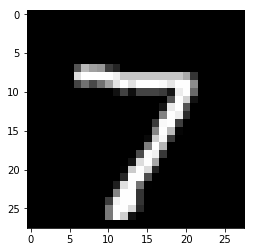

In [6]:
#lets see the image
plt.imshow(pixels,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));

In [7]:
#Lets conver the data into numpy matrices
images_data=[]
labels_data=[]
for data in mnist:
    label,pixels=data
    images_data.append(pixels.ravel()) #use ravel() to convert a 2D matrix into a vector
    labels_data.append(label)

X=np.asarray(images_data)
y=np.asarray(labels_data)

In [9]:
from sklearn.decomposition import PCA
# define the PCA algorithm parameters, in this example we will define the variance retained
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(X)
print(pca.n_components_)

13


The idea with going from 784 components to 154 is to reduce the running time of a supervised learning algorithm. One of the cool things about PCA is that we can go from a compressed representation (154 components) back to an approximation of the original high dimensional data (784 components).

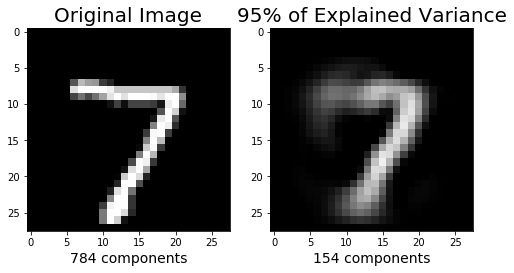

In [10]:
approximation = pca.inverse_transform(lower_dimensional_data)

plt.figure(figsize=(8,4))

# Original Image, first data sample
plt.subplot(1, 2, 1)
label,pixels=mnist[0] #you can modify the originalsample to show
plt.imshow(pixels,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2)
plt.imshow(approximation[0].reshape(28, 28),   #remmebr to modify the approximation 
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)

<font color='red'>TASK: TRY DIFFERENT RECONSTRUCTIONS ACCORDING TO DIFFERENT VARIANCES OVER DIFFERENT DATA SAMPLES TO UNDERERSTAND EFFECTS ON IMAGES</font> 

In [ ]:
# Add your code

#### PCA as a feature extraction

We can use the projections into the PCA space as a feature vector. Lets try to plot the first 2 components of the PCA projections

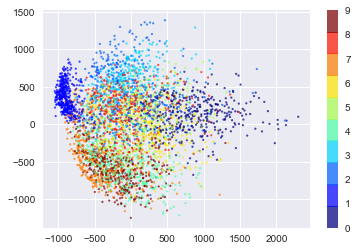

In [14]:
#We will plot the first 4000 samples
plt.scatter(lower_dimensional_data[:4000, 0], lower_dimensional_data[:4000, 1], c=y[:4000], edgecolor='none', alpha=0.7, lw=1,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

<font color='red'>TASK: TRY DIFFERENT PCA COMPONENTS COMBINATIONS AND SHOW THE CUMULATIVE EXPLAINED VARIANCE FOR EACH COMBINATION</font> 